# ML 기계학습

In [1]:
# ML
## 지도 - 데이터(Feature 특성) + 타겟(라벨/정답) 
### 분류: 카테고리/범주 나누기
### 회귀: 숫자(수치) 정답
### KNN => 분류/회귀

## 비지도 - 데이터(Feature 특성, 속성)
# - 결과 평가 X
# - 데이터의 특성(Feature) 추출

## 강 화 - 데이터(Feature 특성, 속성)
# - 피드백 (예) 게임, 걸음걸이

In [2]:
# REGRESSION 회귀
# Linear Regression (선형 회귀)
## 선형 형태 데이터 분포 - 많은 데이터 만족하는 직선 1차 함수 y=Wx+b

In [3]:
# Multiple Regression (다중 회귀)
## 선형 형태 데이터 분포 - 많은 데이터 만족하는 직선 1차 함수 y=ax1+bx1+c

In [4]:
# Polynomial Regression (다항 회귀)
## 곡선 형태 데이터 분포 - 많은 데이터 만족하는 곡선
## 2차 함수 y=a2x2+a1x1+c / N차 함수 = y=adxd+..+a2x2+a1x1+b

In [5]:
# Logistic Regression (로지스틱 회귀) <- 신경망 DL
## S자 형태 데이터 분포 / 많은 데이터 만족하는 s형 곡선
## 예시 - 공부 시간과 합격 여부
# sigmoid(y=ax+b)
### 시그모이드(sigmoid) 함수
# 0.5 이상 양수 / 0.5 이하 음수

## 뉴욕시의 Taxi 데이터 활용한 예측 모델
---
- 데이터셋 : 케글의 NYC_taxi.csv
    - 조건 : 뉴욕시 내
- 거리에 따른 요금 예측 ==> 회귀
    - 조건 : 뉴욕시 내
- 승차에 따른 하차지역 예측 ==> 분류

### [1] 데이터 로딩

In [2]:
# 모듈 로딩 ------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일 관련 변수 선언 --------------------------------------------
DIR_PATH='../Data1/'
FILE_NAME=DIR_PATH+'NYC_taxi.csv'

In [3]:
# 데이터 로딩
# nrows = 로딩 데이터 수
taxiDF=pd.read_csv(FILE_NAME, nrows=5000, parse_dates=['pickup_datetime'])

In [4]:
taxiDF.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxiDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                5000 non-null   object             
 1   fare_amount        5000 non-null   float64            
 2   pickup_datetime    5000 non-null   datetime64[ns, UTC]
 3   pickup_longitude   5000 non-null   float64            
 4   pickup_latitude    5000 non-null   float64            
 5   dropoff_longitude  5000 non-null   float64            
 6   dropoff_latitude   5000 non-null   float64            
 7   passenger_count    5000 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
taxiDF.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

## [2] 결측치 및 이상치 체크

In [7]:
taxiDF.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
taxiDF.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.296238,-72.426826,39.867237,-72.426130,39.875767,1.631000
std,9.710106,10.722381,6.351342,10.722293,6.326084,1.257122
min,-2.900000,-74.438233,-73.991840,-74.429332,-73.979010,0.000000
25%,6.000000,-73.992449,40.734045,-73.991349,40.734379,1.000000
50%,8.500000,-73.982069,40.752128,-73.980196,40.753512,1.000000
75%,12.500000,-73.967040,40.766890,-73.963589,40.767636,2.000000
max,180.000000,40.751582,41.366138,40.758867,41.032598,6.000000


### 특성 새롭게 생성 => 거리 Feature
---
- 공식 : (x2-x1)^2 + (y2-y1)^2 계산 결과의 루트

In [9]:
# taxiDF.pickup_latitude , taxiDF['pickup_latitude']

In [10]:
(taxiDF.pickup_longitude - taxiDF.dropoff_longitude)**2

0       0.000007
1       0.001353
2       0.000072
3       0.000020
4       0.000131
          ...   
4995    0.000023
4996    0.000022
4997    0.000009
4998    0.000157
4999    0.000353
Length: 5000, dtype: float64

In [40]:
distance = (taxiDF.pickup_latitude - taxiDF.dropoff_latitude)**2 + (taxiDF.pickup_latitude - taxiDF.dropoff_longitude)**2

In [42]:
type(distance)

taxiDF['distance']=distance

In [43]:
taxiDF

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,13124.664783
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,13153.932075
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,13168.139125
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,13161.759707
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,13161.748549
...,...,...,...,...,...,...,...,...,...
4995,2010-09-04 12:45:32.0000001,6.5,2010-09-04 12:45:32+00:00,-73.980622,40.745157,-73.975777,40.755863,1,13160.892812
4996,2011-06-13 10:53:52.0000006,4.9,2011-06-13 10:53:52+00:00,-73.956664,40.766989,-73.961371,40.772639,1,13162.596620
4997,2013-12-12 21:26:40.0000004,7.5,2013-12-12 21:26:40+00:00,-73.988707,40.734343,-73.991737,40.722582,1,13162.073570
4998,2010-03-08 14:01:00.00000067,7.7,2010-03-08 14:01:00+00:00,-73.952795,40.776642,-73.965320,40.759412,5,13165.718140


# Scikit-learn
1) 데이터 수집 & 준비

2) 데이터 전처리
 - 데이터 / 타겟 분리
 - 데이터 표준화 / 정규화
 - 타겟(라벨) 인코딩
    
3) 학습위한 데이터 준비
 - 데이터 셋
    - 학습용 데이터셋 => 학습에 사용
    - 검증용 데이터셋 => 모델 생성 중에 사용
    - 테스트용 데이터셋 => 모델 완성 후 사용

4) 학습 모델 생성
 - 학습 방법 선정 및 모델 객체 생성
 - 학습 진행
    - 모델 파라미터 최적화 => 학습에 의해서 결정되는 파라미터
    - 최적의 모델 파라미터를 찾기 위한 방법 => 최적화(optimizer)
    - 예) W 가중치, b 절편
 - 모델 평가
    - 성능 개선 => 하이퍼파라미터 (모델마다 다름)
    - 예) KNN -> K, 학습 횟수, 학습크기(배치 사이즈), 규제 값들

5) 모델 테스트
 - 학습에 사용되지 않은 데이터
 - 새로운 데이터로 테스트 진행

In [9]:
# 모듈 로딩 ---------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
## [1] 데이터 준비
# 시간 : 점수
x = [2, 4, 6, 8, 10, 12]
y = [40, 50, 60, 70, 80, 90]

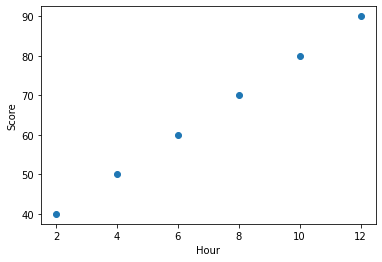

In [11]:
## [2] 데이터 분포 분석 => EDA => 시각화
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

In [12]:
# 시간과 점수는 비례 관계
# 선형의 데이터 분포
# 독립변수 => hour
# 종속변수 => score

In [13]:
# 학습에 사용되는 형태로 데이터 변환
# 판다스
import pandas as pd

df = pd.DataFrame([x, y])
# df = pd.DataFrame({'Hour': x, 'Score': y})
print('shape:', df.shape)

shape: (2, 6)


In [14]:
import numpy as np

arrx=np.array(x)
arry=np.array(y)

print('arrx:', arrx.shape, 'arry:', arry.shape)

arrx: (6,) arry: (6,)


In [15]:
# 1차원 -> 2차원
arrx = arrx.reshape(-1, 1)
print('arrx:', arrx.shape, arrx.ndim, 'arry:', arry.shape, arry.ndim)

arrx: (6, 1) 2 arry: (6,) 1


In [16]:
## [3] 학습 방법 선택 및 모델 생성
# 시간에 따른 점수 예측
# 데이터 + 라벨 => 지도학습
# 선형 데이터 분포 => 선형 모델 적용

In [17]:
# 모델 객체 생성
model = LinearRegression()

In [18]:
# 학습 ==> 트레이닝 데이터 사용
# fit()메서드 => 2차원 형태 데이터
model.fit(arrx, arry)

LinearRegression()

In [19]:
# 모델 파라미터 확인 => W 가중치, b 절편
print('w :', model.coef_, 'b :', model.intercept_)

w : [5.] b : 29.999999999999993


In [20]:
## [4] 모델 평가

# 테스트(검증) 데이터로 평가  => score()
# score()
 ## 분류 : 정답  ---  예측답   => 맞춘 정도
    # - **정확도(accuracy)**
 ## 회귀 : 정답  ---  예측답   => 차이 오차(Error)
   # - 손실함수(Loss/Cost Function)  : MSE, MAE, RMSE 0 ~ 1 낮을 수록 좋음
   # - **R2 계수 : 0 ~ 1 높을 수록 좋음**
# 회귀 => 결정계수 R^2 반환
model.score(arrx, arry)

1.0

In [21]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

prey = model.predict(arrx)
mae=mean_absolute_error(arry, prey)
mse=mean_squared_error(arry, prey)

print(mae, mse)

1.1842378929335002e-15 8.414516322357459e-30
